# Predicting the cost of health insurance for a person

## Loading, reading and analyzing

> We load the dataset, take a look at it and find some observations

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Loading the dataset directly from the URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
df = pd.read_csv(url)

# Quick look at the first few rows
print("First rows of the dataset:")
print(df.head())

# General info about the dataset
print("\nGeneral info:")
print(df.info())

First rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

General info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None



### Observations
> - No missing values.
> - 'sex', 'smoker', and 'region' are categorical.
> - Target variable is 'charges' (numeric).


In [13]:
# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010



### Observations
> - BMI ranges from 15.96 to 53.13 — quite a spread.
> - Charges range from $1,122 to $63,770 — definitely has high variance.
> - Children max out at 5; looks reasonable.


## Check for null/missing values

In [14]:
# Checking for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Observations
> - No null values, so no imputation is necessary.


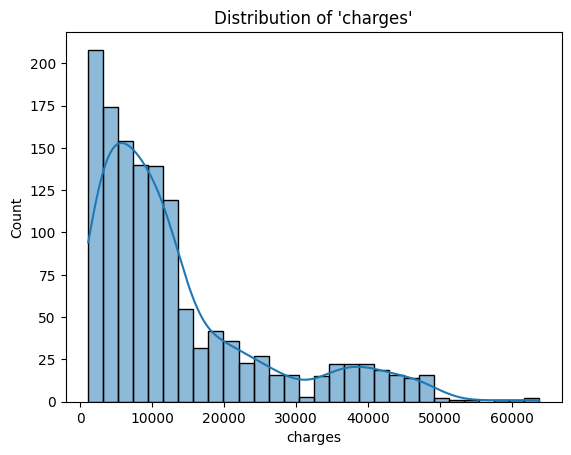

In [15]:
# Plotting the distribution of charges
sns.histplot(df['charges'], kde=True)
plt.title("Distribution of 'charges'")
plt.show()

### Observations
> - 'charges' is right-skewed (not normally distributed).
> - We might consider log-transforming it for modeling (optional).

## Detection of outliers

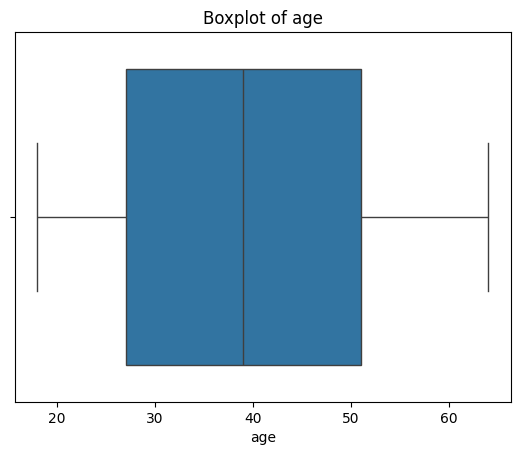

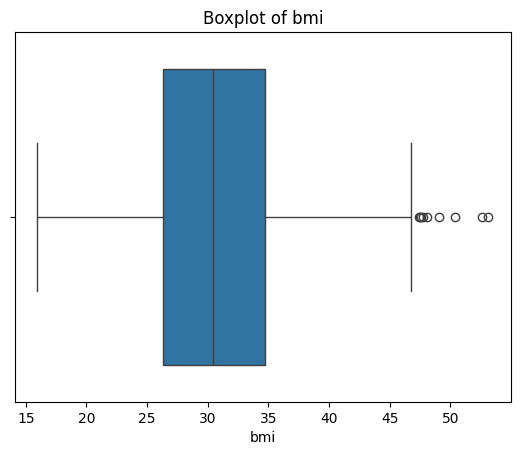

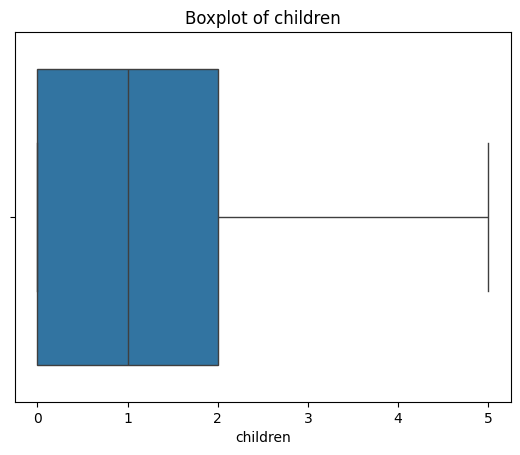

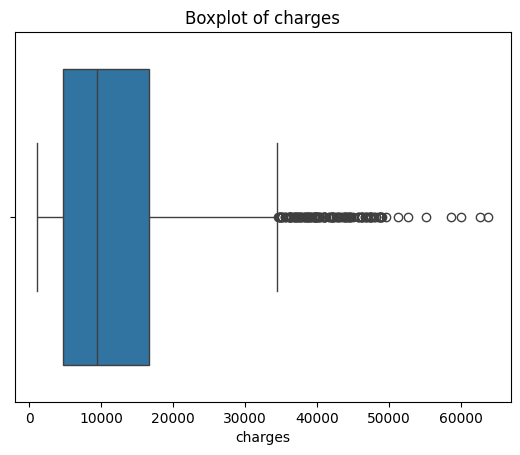

In [16]:
# Boxplots to detect outliers in numeric variables
num_vars = ['age', 'bmi', 'children', 'charges']
for var in num_vars:
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()

### Observations
> - Outliers detected in 'bmi' and 'charges' especially.
> - These may affect the regression model, so we’ll remove them.

## Outlier removal using IQR

In [17]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Removing outliers from 'bmi' and 'charges'
df = remove_outliers_iqr(df, 'bmi')
df = remove_outliers_iqr(df, 'charges')

### Observations
> - The dataset is now cleaner and should be less influenced by extreme values.

## Train / Test Split

In [18]:
# Converting categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print("\nEncoded data (first rows):")
print(df_encoded.head())


Encoded data (first rows):
   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


> This will make them compatible and analyzable.

### Observations
> - Categorical columns like 'sex', 'smoker', and 'region' have been encoded properly.

In [19]:
# Splitting data into features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Observations
> - Feature scaling helps linear models perform better and makes coefficients more comparable.

## Creating the model

In [20]:
# Creating and training a linear regression model on scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
mse_base = mean_squared_error(y_test, y_pred)
r2_base = r2_score(y_test, y_pred)

print("\nModel evaluation with scaled features:")
print("MSE:", mse_base)
print("R2 Score:", r2_base)


Model evaluation with scaled features:
MSE: 19877696.620193187
R2 Score: 0.632813516344632


### Observations
> - R² shows how well the model explains variance.
> - If still low (< 0.75), we might try Ridge, Lasso, or tree-based models, but for now, it's fine.

## Visualization of predictions

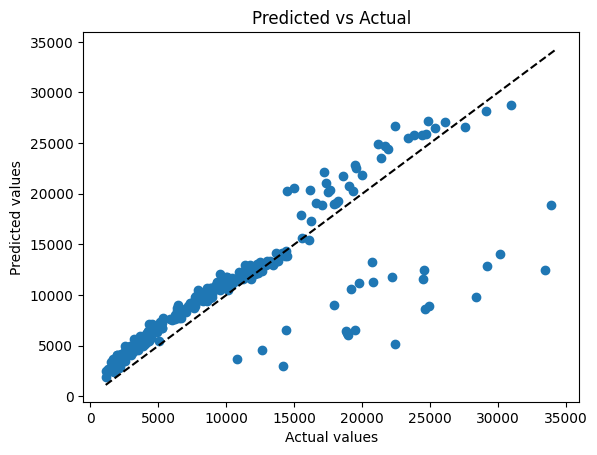

In [21]:
# Visualizing predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # ideal fit line
plt.show()



### Observations
> - Ideally, points should follow the diagonal.
> - If there’s too much spread, we may need more complex models or better features.

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Pipeline with StandardScaler and Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Hyperparameter grid for alpha
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions with best model
y_pred_ridge = best_model.predict(X_test)

# Evaluation of improved model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nImproved Ridge Regression Model Evaluation:")
print("Best alpha:", grid_search.best_params_['ridge__alpha'])
print("MSE:", mse_ridge)
print("R2 Score:", r2_ridge)

# Cross-validated R2 on training data
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())

# Comparison assuming you already have mse_base and r2_base from base Linear Regression
print("\n=========================")
print("Model Comparison Summary:")
print("=========================")
print(f"Base Linear Regression - MSE: {mse_base:.2f}, R2: {r2_base:.4f}")
print(f"Ridge Regression       - MSE: {mse_ridge:.2f}, R2: {r2_ridge:.4f}")
print("=========================")



Improved Ridge Regression Model Evaluation:
Best alpha: 10
MSE: 19846150.302453246
R2 Score: 0.6333962489270095
Cross-validated R2 scores: [0.55244289 0.59073059 0.68461154 0.65921792 0.44117611]
Mean CV R2: 0.5856358124777595

Model Comparison Summary:
Base Linear Regression - MSE: 19877696.62, R2: 0.6328
Ridge Regression       - MSE: 19846150.30, R2: 0.6334
